***
# <h1 align = 'center'>Analyse des réseaux sociaux avec Python</h1>  
#### <center> Prof. Ben Hiba Lamia </center>
#### <center> Réalisé par : Mohamed Yahya Mohamed et El Kharchi Sidi Mohamed </center>
#### <center> Ecole Centrale de Casablanca  </center>
#### <center> 02 février 2022 </center>
***

### Objectifs de ce projet :
- Extraire des données des tweets concernant le sujet de CAN 2022 pour l'analyse des réseaux sociaux.
- Analyse déscriptive de réseaux sociaux avec networkx 
- Visualisation des réseaux

#### I. Importation de données de tweet

Nous collectons des données de tweet concernant la compétition de CAN 2022 organisée en cameroun, à partir de la plateforme de réseaux sociaux à traves des API. Nous collectons 6000 tweet.

In [ ]:
!pip install tweepy

In [368]:
import pandas as pd
import numpy as np
import tweepy

In [4]:
# Authentication
consumer_key = 'g5i9SPCcomZ3yU5tYZUzBJhyD'
consumer_secret = 'SHe4U9eZjObhw4dK20wNDFezkTwgZZ35gMuQba3ZVLYZRrfyes'
bearer_token = 'AAAAAAAAAAAAAAAAAAAAAEW%2BYQEAAAAARtRoP2GgZKApzilcW7B5z1l0ovQ%3DS1ZDcQofQiEHBL5wcnNPo8yn3UKon2x5vmoiSYWOveIWnxQ0FP'
access_token = '1461107350279004163-FiD3iZ9YzCPh01KglFRSe8QcSTHlZI'
access_secret = 'hm2QEyQpXRM6ID2QVJpMMytOeB2nmkY9yKqBaC3YKB9oo'
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)
api = tweepy.API(auth,wait_on_rate_limit=True)

In [466]:
Tweets=list()
for st in tweepy.Cursor(api.search_tweets,q='CAN 2022',lang='en').items(6000):
    Tweets.append(st)

Rate limit reached. Sleeping for: 745
Rate limit reached. Sleeping for: 737


Nous avons une list de 6000 tweets.Nous stockons les tweets dans list sous forme des dictionnaires

In [467]:
Tweets=[Tweets[i]._json for i in range(len(Tweets))]

L'objectif est d'examiner les réponses et les retweets des tweets. Nous allons créer une liste qui contient une paire composée du nom d'utilisateur du tweet original et du nom d'utilisateur de la personne qui a retweeté ce tweet.

In [469]:
def Get_list_pair(Tweets):
    List_pair=list()
    for tweet in Tweets:
        try :
            retweets=tweet['retweeted_status']
            if retweets:
                List_pair.append([retweets['user']['screen_name'],tweet['user']['screen_name'],tweet['text']])
        except:
            pass
    return List_pair 

In [470]:
List_pair=Get_list_pair(Tweets)

In [471]:
import networkx as nx

Pour faciliter le traitement avec python, nous convertissons la list à un DataFrame

In [472]:
graph_data=pd.DataFrame.from_records(List_pair,columns=['from','retweet_by','tweet'])

In [473]:
# La structure de DataFrame
graph_data.head()

,from,retweet_by,tweet
0,kalaither,kapookkapik_ps,"RT @kalaither: [22.02.02] #洋迪 for ""Chinese Dre..."
1,stelmo_martinez,MrMacAISD,"RT @stelmo_martinez: Congrats to Lovely, our 2..."
2,yougbinie,metanoiahobii,RT @yougbinie: hey guys!~ i made this twibbon ...
3,MatRebellius,_mpsinha,RT @MatRebellius: Good read – WEF report on h...
4,ctrlhwng,halselya,RT @ctrlhwng: 🐺in 2022 i hope changbin becomes...


À l'aide de groupby de pandas, nous créons une colonne de fréquence qui calcule la récurrence des interactions entre deux utilisateurs.

In [474]:
# Create frequency column and display a few elements of your dataframe
graph_data_frq=graph_data.groupby(['from','retweet_by']).size().reset_index()
graph_data_frq.columns=['from','retweet_by','frq']
graph_data_frq.head()

,from,retweet_by,frq
0,01Btsxarmy,can_canela7,1
1,01Btsxarmy1,can_canela7,1
2,0xSummy,0xbigwin_2022,1
3,2020thewalk,Maite66763376,1
4,2021_free,FitzingerMarina,1


***

### II. Création de Network

A ce stade, nous avons un Dataframe avec 3 colonnes 'from : répresente le twiteur préncipal', 'retweet_by : celui qui a retwiter le tweet principal' et 'fréquence'.

Nous allons maintenant créer notre réseau sur la base du Dataframe. Pour une analyse, nous allons commencer avec un réseau pondéré non dirigé.

En suite nous créons un graphique, en utilisant les fonctions de networkx, avec la fréquence comme poids de vos bords. 

#### le graphe

In [475]:
# Create an undirected weighted graph using your Dataframe
import networkx as nx
graph=nx.from_pandas_edgelist(graph_data_frq,source='from',target='retweet_by',edge_attr='frq',create_using=nx.Graph())

In [476]:
nx.info(graph)

'Name: \nType: Graph\nNumber of nodes: 5247\nNumber of edges: 4065\nAverage degree:   1.5495'

### III. Analyse de graphe

Après avoir créé le nœud et l'arête du graphique, nous voyons le nombre de nœuds et d'arêtes présents.

In [477]:
print(f"Nous avons pour ce graphe {graph.number_of_nodes()} nœuds et {graph.number_of_edges()} edges ")

Nous avons pour ce graphe 5247 nœuds et 4065 edges 


Effectuez des analyses de réseau structurel micro et macro sur votre graphique Twitter.

Vous pouvez créer un cadre de données pour vos mesures au niveau des nœuds.
Afficher la distribution de vos métriques....

Nous établissons généralement des graphiques pour certaines des mesures afin d'obtenir un meilleur aperçu de leurs valeurs.

Le degré d'un nœud u, désigné par deg(u), est le nombre d'arêtes qui se produisent vers ce nœud. En d'autres termes, il s'agit du nombre de connexions d'un nœud particulier. Le degré maximal d'un graphe et le degré minimal d'un graphe sont respectivement le degré maximal et minimal de ses nœuds.

In [478]:
degrees = [val for (node, val) in graph.degree()]

In [479]:
print(f"Le degré maximal du graphique est {np.max(degrees)}")   
print(f"Le degré minimum du graphique est {np.min(degrees)}")  

Le degré maximal du graphique est 102
Le degré minimum du graphique est 1


In [480]:
# la densité
nx.density(graph)

0.0002953596706968548

Vérifier si le graphe est connecté 

In [481]:
nx.connected.is_connected(graph)

False

In [482]:
nx.algorithms.average_clustering(graph)

0.004603919551487831

Afficher le degré pour chaque noeud

In [483]:
degree_df=pd.DataFrame.from_dict(dict(nx.degree(graph,weight='frq')),orient='index')
degree_df.reset_index(inplace=True)
degree_df.columns=['node','degree']
degree_df=degree_df.sort_values('degree',ascending=False)
degree_df.tail

<bound method NDFrame.tail of                  node  degree
2630   Schwarzenegger     102
246        BB_13AYAAN      97
5115           wealth      76
1098   FastBreakCards      73
2346   PokemonMasters      72
...               ...     ...
1918  JillPal53544175       1
1917         MJAIKMAN       1
1916          reohpsy       1
1915          mit_ilp       1
5246   chaeyeoniecart       1

[5247 rows x 2 columns]>

Présentation de la densité des degrés des noeuds

In [484]:
import seaborn as sns

C:\Users\USER\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='degree', ylabel='Density'>

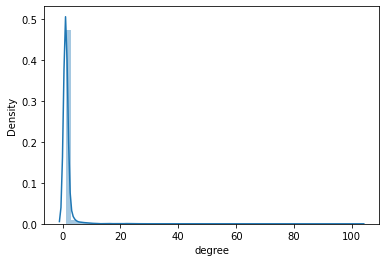

In [485]:
sns.distplot(degree_df['degree'])

In [486]:
nx.degree_centrality(graph)

{'01Btsxarmy': 0.00019062142584826535,
 'can_canela7': 0.001143728555089592,
 '01Btsxarmy1': 0.00019062142584826535,
 '0xSummy': 0.00019062142584826535,
 '0xbigwin_2022': 0.00019062142584826535,
 '2020thewalk': 0.00019062142584826535,
 'Maite66763376': 0.00019062142584826535,
 '2021_free': 0.0003812428516965307,
 'FitzingerMarina': 0.00019062142584826535,
 'TRACEYSWANN9': 0.00019062142584826535,
 '23shadesofpress': 0.00019062142584826535,
 'kriegerxpress': 0.00019062142584826535,
 '2Photon_2022': 0.0003812428516965307,
 '2YEONZIP': 0.0003812428516965307,
 'ilusoyeon': 0.0003812428516965307,
 'labradora18': 0.0003812428516965307,
 '49SPORTNET': 0.00019062142584826535,
 'Thomas_Scott99': 0.00019062142584826535,
 '4As': 0.00019062142584826535,
 'Digitas': 0.00019062142584826535,
 '4TaxFairness': 0.001143728555089592,
 'ChristinaCoxArt': 0.00019062142584826535,
 'Duane04854528': 0.00019062142584826535,
 'Suzecat52': 0.00019062142584826535,
 'elizabetm1': 0.00019062142584826535,
 'peacelovi

In [487]:
nx.closeness_centrality(graph)

{'01Btsxarmy': 0.0006238519391397774,
 'can_canela7': 0.001143728555089592,
 '01Btsxarmy1': 0.0006238519391397774,
 '0xSummy': 0.00019062142584826535,
 '0xbigwin_2022': 0.00019062142584826535,
 '2020thewalk': 0.00019062142584826535,
 'Maite66763376': 0.00019062142584826535,
 '2021_free': 0.0003812428516965307,
 'FitzingerMarina': 0.0002541619011310204,
 'TRACEYSWANN9': 0.0002541619011310204,
 '23shadesofpress': 0.00019062142584826535,
 'kriegerxpress': 0.00019062142584826535,
 '2Photon_2022': 0.0,
 '2YEONZIP': 0.0023984987174694356,
 'ilusoyeon': 0.0035292195414193123,
 'labradora18': 0.0035292195414193123,
 '49SPORTNET': 0.00019062142584826535,
 'Thomas_Scott99': 0.00019062142584826535,
 '4As': 0.00019062142584826535,
 'Digitas': 0.00019062142584826535,
 '4TaxFairness': 0.012078421187220953,
 'ChristinaCoxArt': 0.009782664536032857,
 'Duane04854528': 0.009782664536032857,
 'Suzecat52': 0.009782664536032857,
 'elizabetm1': 0.009782664536032857,
 'peacelovingrn': 0.015603571262224352,
 

On verifie si le graphe est connecté ou non.\\
Un graphe n est connecté si, pour chaque paire de nœuds, il existe un chemin entre eux. Pour cela, la plupart des noeuds doivent avoir au moins un degré de deux, à l'exception de ceux appelés feuilles qui ont un degré de 1. D'après les caractéristiques du graphe, nous pouvons soupçonner que le graphe n'est pas connecté. Afin de le confirmer, nous pouvons utiliser nx.is_connected.

In [488]:
if nx.is_connected(graph):
    print("Le graphe est connecté")
else:
    print("Le graphe n'est pas connecté")

Le graphe n'est pas connecté


Après avoir confirmé que le graphique n'est pas connecté, nous pouvons vérifier combien de composants connectés il possède :

In [489]:
print(f"il y a {nx.number_connected_components(graph)} composentes connectées dans ce graphe") 

il y a 1303 composentes connectées dans ce graphe


La composente qui a le plus de noeuds est :
    

In [490]:
largest_subgraph = max((graph.subgraph(c) for c in nx.connected_components(graph)), key=len)

In [491]:
print(f"il y a {largest_subgraph.number_of_nodes()} noeud et {largest_subgraph.number_of_edges()} \
edges presente dans cette composente")

il y a 270 noeud et 271 edges presente dans cette composente


In [492]:
print(f"Le coefficient de regroupement moyen est {nx.average_clustering(largest_subgraph)} dans le plus grand sous-graphe")
print(f"La transitivité du plus grand sous-graphe est {nx.transitivity(largest_subgraph)}")

Le coefficient de regroupement moyen est 0.0 dans le plus grand sous-graphe
La transitivité du plus grand sous-graphe est 0


In [493]:
print(f"Le diamètre de ce sous graphique est {nx.diameter(largest_subgraph)}")
print(f"La distance moyenne entre deux nœuds quelconques est {nx.average_shortest_path_length(largest_subgraph):.2f}")

Le diamètre de ce sous graphique est 11
La distance moyenne entre deux nœuds quelconques est 4.79


#### 2. Déssiner le graphe

Afin d'avoir une vue d'ensemble du réseau, nous le visualisons à l'aide de fonctions de dessin. 
Nous utilisons Networkx qui offre la possibilité de dessiner le graphique, 

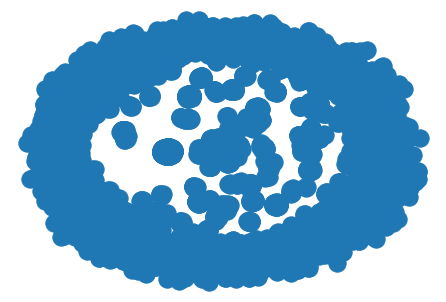

In [464]:
nx.draw(graph,pos=nx.spring_layout(graph))

In [494]:
# Comme le graphe n'est pas connecté, alors on peut avoir plusieurs sous-graphe connectés
Components=[g_ for g_ in nx.connected.connected_components(graph)]

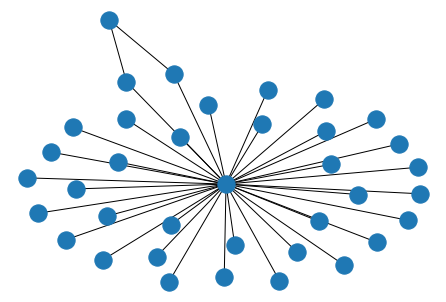

In [495]:
# Exemple d graphe de composente 
nx.draw(graph.subgraph(Components[6]))

#### Nous nous concentrons sur la composante maximale en termes de nœuds

In [496]:
largest_subgraph = max((graph.subgraph(c) for c in nx.connected_components(graph)), key=len)

In [497]:
graph_centrality = nx.degree_centrality(largest_subgraph)
from operator import itemgetter
max_de = max(graph_centrality.items(), key=itemgetter(1))
graph_closeness = nx.closeness_centrality(largest_subgraph)
max_clo = max(graph_closeness.items(), key=itemgetter(1))
graph_betweenness = nx.betweenness_centrality(largest_subgraph, normalized=True, endpoints=False)
max_bet = max(graph_betweenness.items(), key=itemgetter(1))

In [498]:
print(f"Le nœud avec screen_name FastBreakCards {max_de[0]} a un degré de centralité de {max_de[1]:.2f} qui est le maximum du graphique")
print(f"Le nœud avec screen_name {max_clo[0]} a une centralité de proximité de  {max_clo[1]:.2f} qui est le maximum du graphique")
print(f"Le nœud avec screen_name {max_bet[0]} a une centralité d'interdépendance de {max_bet[1]:.2f} qui est le maximum du graphique")

Le nœud avec screen_name FastBreakCards PokemonMasters a un degré de centralité de 0.24 qui est le maximum du graphique
Le nœud avec screen_name washingtonpost a une centralité de proximité de  0.35 qui est le maximum du graphique
Le nœud avec screen_name washingtonpost a une centralité d'interdépendance de 0.75 qui est le maximum du graphique


In [499]:
import matplotlib.pyplot as plt

In [500]:
nx.info(largest_subgraph)

'Name: \nType: Graph\nNumber of nodes: 270\nNumber of edges: 271\nAverage degree:   2.0074'

In [501]:
layout=nx.spring_layout(largest_subgraph)

<function matplotlib.pyplot.show(close=None, block=None)>

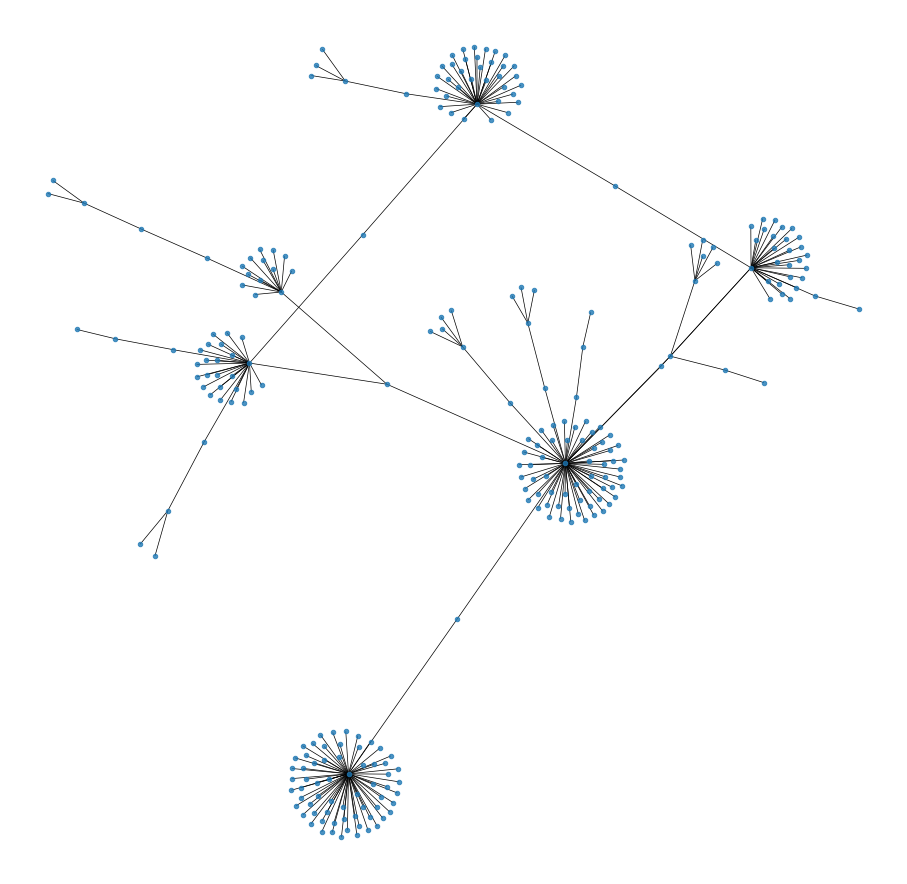

In [502]:
plt.figure(figsize=(16,16))
plt.axis('off')
nx.draw_networkx_nodes(largest_subgraph,pos=layout, node_size=20, alpha=0.8)
nx.draw_networkx_edges(largest_subgraph,pos=layout, width=0.7, edge_color='black')
plt.show